## zfmlhw05

### 1. 阅读作业
在本次课程中，你学习了VC维这个概念。“对于非线性分类器，VC维非常难于计算，在学术研究领域，这仍然是一个有待回答的开放性问题。但对于线性分类器，VC维是可以计算的。” 请你阅读下面博文中  
http://blog.csdn.net/baimafujinji/article/details/44856089
的第二部分“VC维”，以了解对于一个线性分类器，我们该如何计算其VC维，特别注意“Points in General Position和Shatter”这两个概念。提交一张你阅读的界面截图。  

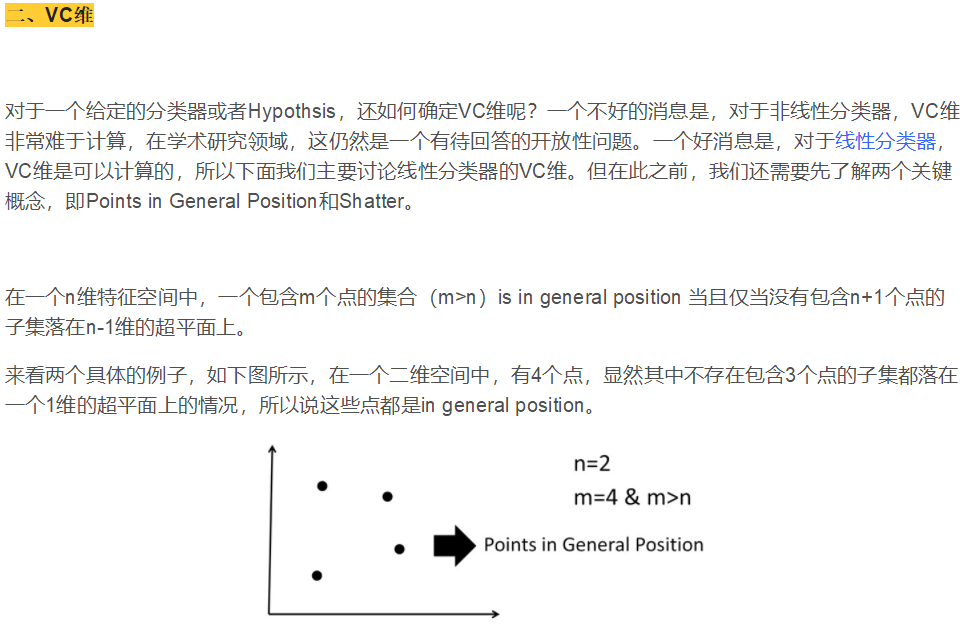

另外，你还需要阅读如下博文中的关于NFL原理的部分（注意：你只需要阅读文章中的第一部分暨NFL原理的部分）  
http://blog.csdn.net/baimafujinji/article/details/6475824  
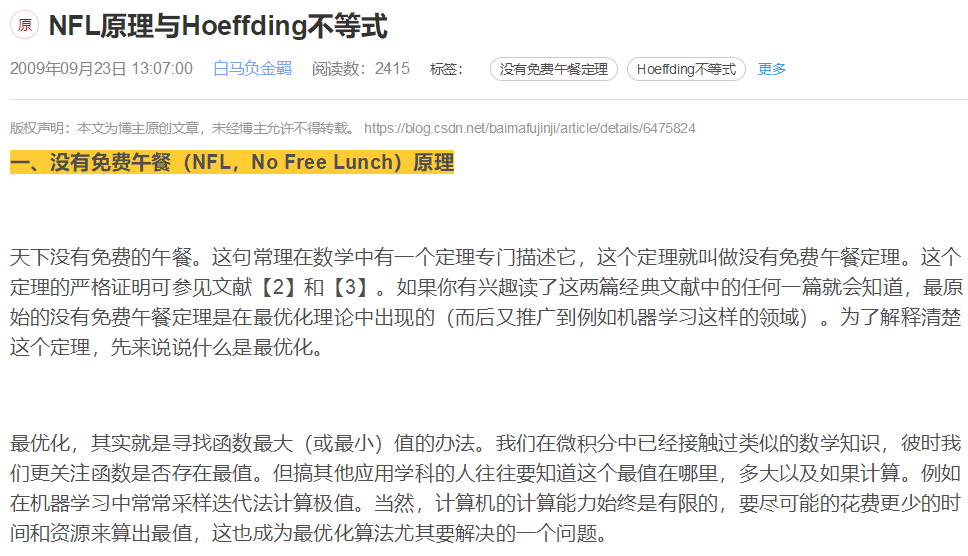  
提交一张你阅读的界面截图。  
#### 同时，请你思考一下，NFL原理和我们讲的VC维有什么相通的地方或者有什么联系，用两三句话简单总结一下你的认识或者理解。    
NFL表述的意思是没有放之四海皆准的方法。如果一个算法对某些问题非常好，那么一定存在另一些问题，对于这些问题，该算法比随机猜测还要差。    
VC维表述的就是用来衡量一个算法适用于一类数据的最大边界。

你不需要回答，但请你仔细思考一下文章最后给出的结论：d维空间中的线性分类器之VC维等于d+1，如果你自己能够理解清楚这背后的道理，说明你对VC维的理解已经足够深入了！

### 2. 编程实践题（*20%）


在之前的作业中我们已经给出了countries_data数据，现在请你利用此数据建立最大间隔分类器（也就是SVM模型）来对两类国家进行分类。具体要求如下：  
1）使用MATLAB, Python或者R。   
2）通过代码读入一个csv文件的方式来导入数据。  
3）评估你的分类器（使用Accuracy、Precision、Recall和F1-Score）。  
4）用图形化的方式展示你的分类结果。

In [14]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('countries_data.csv',encoding='gbk')
df.head()

countries  Services_of_GDP  ages65_of_total  label
0   Belgium             76.7               18      1
1    France             78.9               18      1
2   Denmark             76.2               18      1
3     Spain             73.9               18      1
4     Japan             72.6               25      1

In [8]:
X = df.iloc[:,1:3]
Y = df.iloc[:,3]

#X.as_matrix()
#FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
X = X.values
Y = Y.values

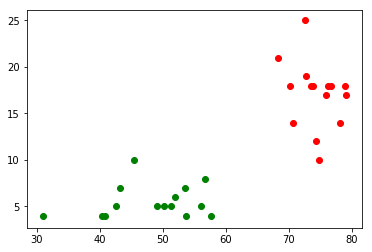

In [18]:
plt.scatter([X[:,0][i] for i in range(len(Y)) if Y[i]==1],[X[:,1][i] for i in range(len(Y)) if Y[i]==1],color='r')
plt.scatter([X[:,0][i] for i in range(len(Y)) if Y[i]==0],[X[:,1][i] for i in range(len(Y)) if Y[i]==0],color='g')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

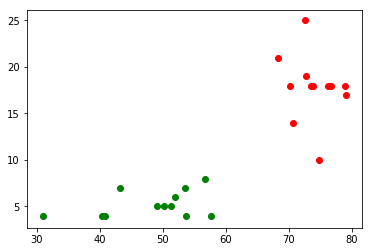

In [30]:
plt.scatter([X_train[:,0][i] for i in range(len(y_train)) if y_train[i]==1],[X_train[:,1][i] for i in range(len(y_train)) if y_train[i]==1],color='r')
plt.scatter([X_train[:,0][i] for i in range(len(y_train)) if y_train[i]==0],[X_train[:,1][i] for i in range(len(y_train)) if y_train[i]==0],color='g')

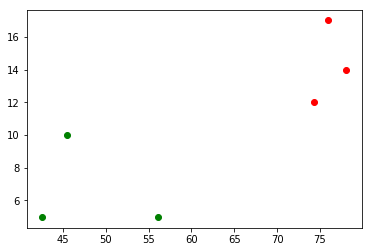

In [31]:
plt.scatter([X_test[:,0][i] for i in range(len(y_test)) if y_test[i]==1],[X_test[:,1][i] for i in range(len(y_test)) if y_test[i]==1],color='r')
plt.scatter([X_test[:,0][i] for i in range(len(y_test)) if y_test[i]==0],[X_test[:,1][i] for i in range(len(y_test)) if y_test[i]==0],color='g')

In [24]:
model = svm.SVC()

In [25]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 1])

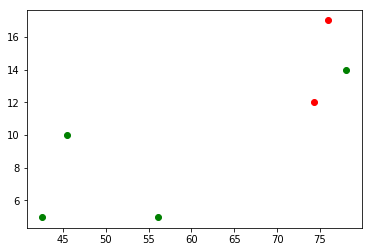

In [32]:
plt.scatter([X_test[:,0][i] for i in range(len(prediction)) if prediction[i]==1],[X_test[:,1][i] for i in range(len(prediction)) if prediction[i]==1],color='r')
plt.scatter([X_test[:,0][i] for i in range(len(prediction)) if prediction[i]==0],[X_test[:,1][i] for i in range(len(prediction)) if prediction[i]==0],color='g')

In [27]:
print("accuracy score: ")
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score: 
0.8333333333333334
             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      0.67      0.80         3

avg / total       0.88      0.83      0.83         6



### 3. 数学推导题 （*35%）
推导PPT中第24页最下方的等式：  
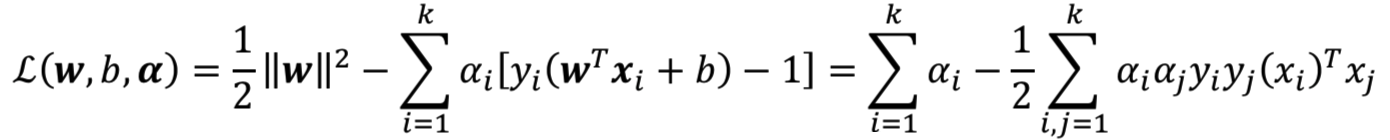

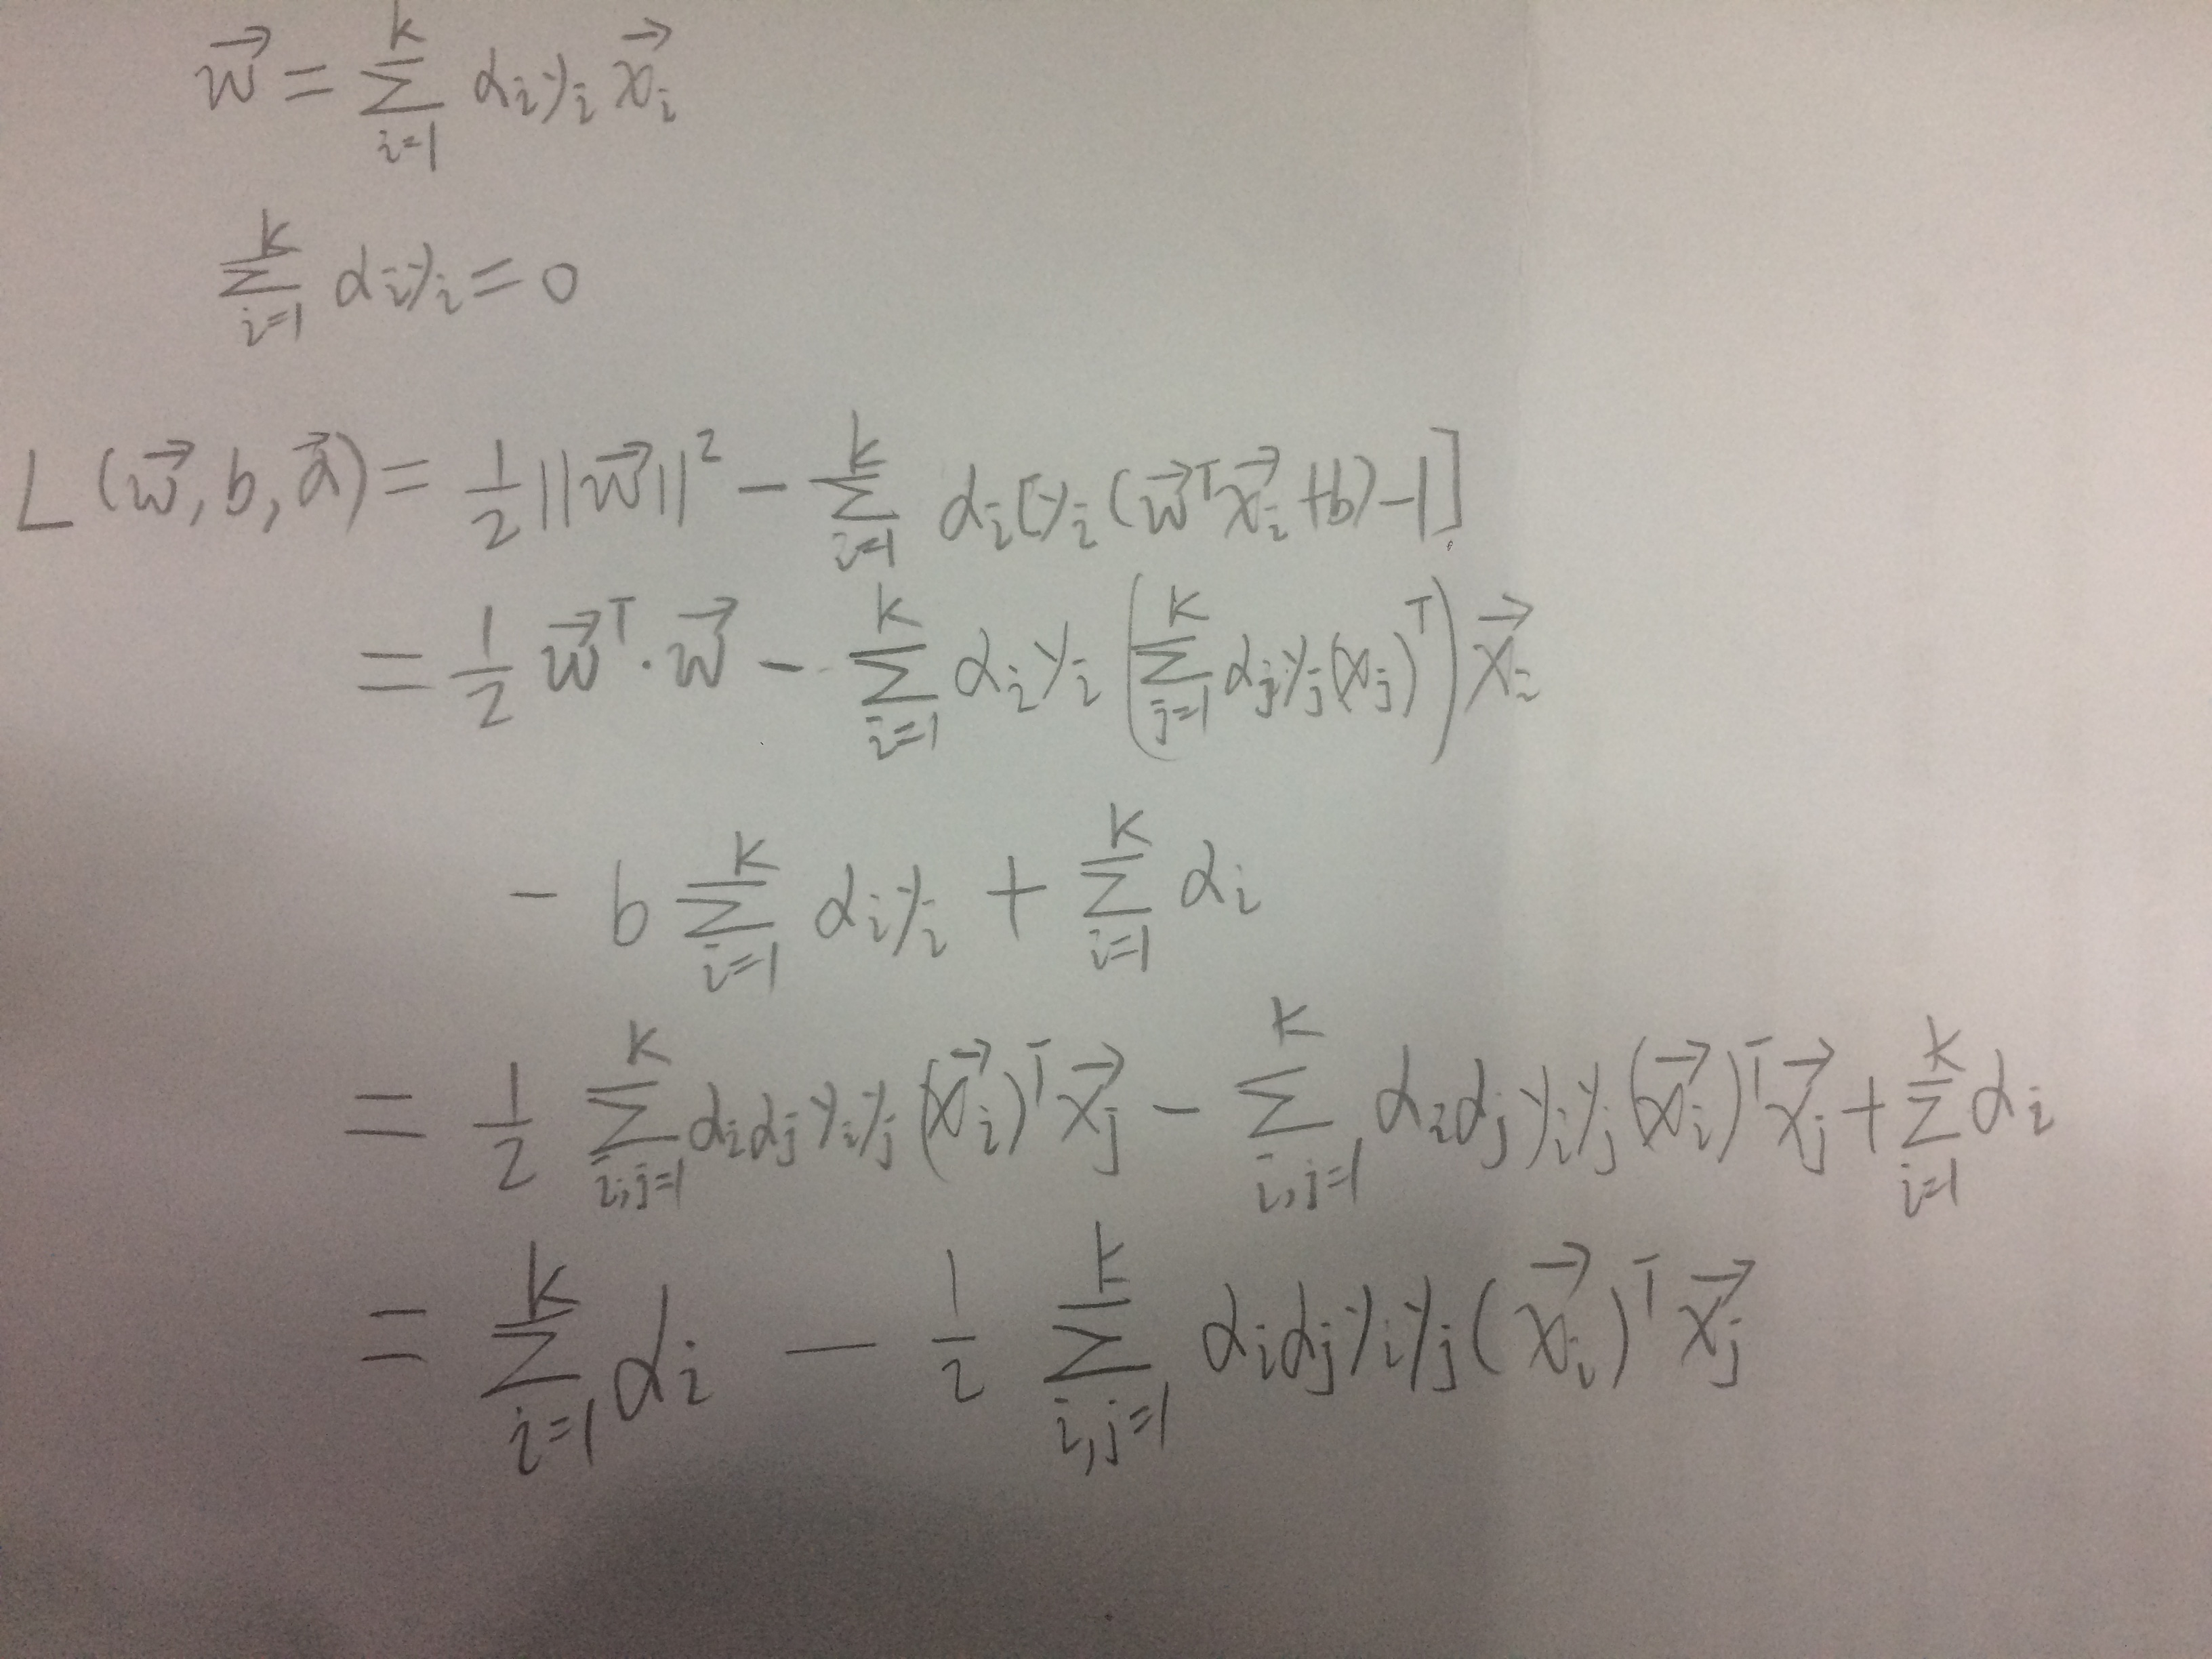

### 4. 证明题（*35%）
对于带等式约束的优化问题，我们可以使用“拉格朗日乘数法”。拉格朗日乘数法在机器学习（甚至图像处理）中都有较多应用，例如SVM中的凸优化、回归分析中的正则化、以及最大熵模型的推导。  
为了强化你对拉格朗日乘数法的理解，最后这个问题可以帮助你亲身体验一下它的应用。请你运用拉格朗日乘数法来证明几何-算术均值不等式。注意：这个不等式的证明方法很多，本题的意思是要求你仅仅使用拉格朗日乘数法来证明之，如果你采用其它方法，则会被判定为“答非所问”。
几何均值不等式：

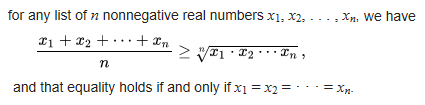

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end

## end